In [27]:
# Import necessary libraries
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split ,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier,BaggingRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

warnings.simplefilter('ignore')

os.chdir('D:\Datasets')

hr = pd.read_csv('Hr_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:
dum_hr = pd.get_dummies(hr, drop_first=True)

# Separate features (X) and target variable (y)
x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [29]:
# Split the data into training and testing sets
# 'x' and 'y' are the feature and target variables, respectively
# 'test_size=0.3' means 30% of the data will be used for testing
# 'stratify=y' ensures the class distribution in the training and testing sets is the same as the original data
# 'random_state=24' sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create an instance of the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Fit the Gradient Boosting Classifier to the training data
# This trains the model on the training data
gbm.fit(x_train, y_train)

# Use the trained Gradient Boosting Classifier to predict the classes of the test data
# This applies the trained model to the test data to get the predicted classes
y_pred = gbm.predict(x_test)

# Calculate and print the accuracy score of the predictions
# The accuracy score measures the proportion of correct predictions made by the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9793287397199377


In [30]:
# Create a Stratified K-Fold cross-validation object
# This will split the data into 5 folds, ensuring the class distribution in each fold is the same as the original data
# 'shuffle=True' ensures the data is shuffled before splitting
# 'random_state=24' sets the random seed for reproducibility
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Create an instance of the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Define the hyperparameter grid to search over
# 'n_estimators' controls the number of trees in the ensemble
# 'learning_rate' controls the step size of the gradient boosting algorithm
# 'max_depth' controls the maximum depth of the individual trees
params = {'n_estimators': [5, 100], 'learning_rate': [0.01, 0.1, 0.3, 0.5], 'max_depth': [1, 3, 5]}

# Create a GridSearchCV object
# This will perform a grid search to find the best combination of hyperparameters
# 'cv=kfold' uses the Stratified K-Fold cross-validation object
# 'verbose=3' sets the verbosity level to 3, which will print progress updates
# 'scoring='neg_log_loss'' sets the scoring metric to negative log loss (lower is better)
gcv = GridSearchCV(gbm, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
# This will perform the grid search and find the best hyperparameters
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best model from the GridSearchCV object
best_model = gcv.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.535 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.535 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.535 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.535 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.534 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.425 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.424 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.424 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.426 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.4

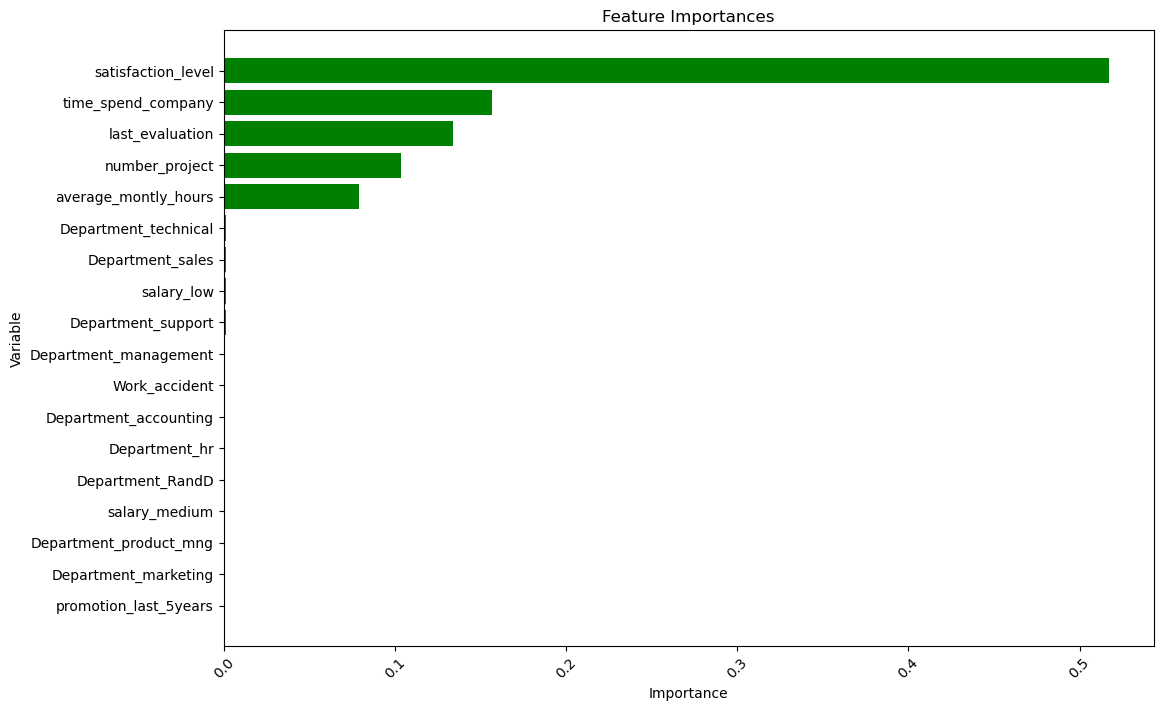

In [31]:
# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_model.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches
plt.barh(pd_imp['var'], pd_imp['imp'], color='g')  # Create the horizontal bar plot

# Add labels and title
plt.ylabel('Variable')  # Label the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.xlabel('Importance')  # Label the x-axis
plt.title('Feature Importances')  # Set the title of the plot

# Display the plot
plt.show()

# Xgboost (pip install xgboost)

In [14]:
from xgboost import XGBClassifier

In [32]:
# Create an instance of the XGBoost Classifier
xgbm = XGBClassifier(random_state=24)

# Create a Stratified K-Fold cross-validation object
# This will split the data into 5 folds, ensuring the class distribution in each fold is the same as the original data
# 'shuffle=True' ensures the data is shuffled before splitting
# 'random_state=24' sets the random seed for reproducibility
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Define the hyperparameter grid to search over
# 'n_estimators' controls the number of trees in the ensemble
# 'learning_rate' controls the step size of the XGBoost algorithm
# 'max_depth' controls the maximum depth of the individual trees
params = {'n_estimators': [5, 100, 150], 'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7], 'max_depth': [1, 3, 5, 7]}

# Create a GridSearchCV object
# This will perform a grid search to find the best combination of hyperparameters
# 'cv=kfold' uses the Stratified K-Fold cross-validation object
# 'verbose=3' sets the verbosity level to 3, which will print progress updates
# 'scoring='neg_log_loss'' sets the scoring metric to negative log loss (lower is better)
gcv = GridSearchCV(xgbm, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
# This will perform the grid search and find the best hyperparameters
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best model from the GridSearchCV object
best_model = gcv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.537 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.537 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.537 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.537 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.536 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.427 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.426 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.426 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.428 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=-0.4

# pip install lightgbm

In [33]:
from lightgbm import LGBMClassifier

In [34]:
# Create an instance of the LightGBM Classifier
lgbm = LGBMClassifier(random_state=24)

# Create a Stratified K-Fold cross-validation object
# This will split the data into 5 folds, ensuring the class distribution in each fold is the same as the original data
# 'shuffle=True' ensures the data is shuffled before splitting
# 'random_state=24' sets the random seed for reproducibility
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Define the hyperparameter grid to search over
# 'n_estimators' controls the number of trees in the ensemble
# 'learning_rate' controls the step size of the LightGBM algorithm
# 'max_depth' controls the maximum depth of the individual trees
params = {'n_estimators': [5, 100, 150], 'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7], 'max_depth': [1, 3, 5, 7]}

# Create a GridSearchCV object
# This will perform a grid search to find the best combination of hyperparameters
# 'cv=kfold' uses the Stratified K-Fold cross-validation object
# 'verbose=3' sets the verbosity level to 3, which will print progress updates
# 'scoring='neg_log_loss'' sets the scoring metric to negative log loss (lower is better)
gcv = GridSearchCV(lgbm, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
# This will perform the grid search and find the best hyperparameters
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best model from the GridSearchCV object
best_model = gcv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 2853, number of negative: 9143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 11996, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237829 -> initscore=-1.164617
[LightGBM] [Info] Start training from score -1.164617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV 1/5]

# catBoostclassifier

In [23]:
from catboost import CatBoostClassifier

In [25]:
# Create an instance of the CatBoost Classifier
cgbm = CatBoostClassifier(random_state=24)

# Create a Stratified K-Fold cross-validation object
# This will split the data into 5 folds, ensuring the class distribution in each fold is the same as the original data
# 'shuffle=True' ensures the data is shuffled before splitting
# 'random_state=24' sets the random seed for reproducibility
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Define the hyperparameter grid to search over
# 'n_estimators' controls the number of trees in the ensemble
# 'learning_rate' controls the step size of the CatBoost algorithm
# 'max_depth' controls the maximum depth of the individual trees
params = {'n_estimators': [5, 100], 'learning_rate': [0.01, 0.1, 0.7], 'max_depth': [1, 3, 5, 7]}

# Create a GridSearchCV object
# This will perform a grid search to find the best combination of hyperparameters
# 'cv=kfold' uses the Stratified K-Fold cross-validation object
# 'verbose=3' sets the verbosity level to 3, which will print progress updates
# 'scoring='neg_log_loss'' sets the scoring metric to negative log loss (lower is better)
gcv = GridSearchCV(cgbm, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
# This will perform the grid search and find the best hyperparameters
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best model from the GridSearchCV object
best_model = gcv.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0:	learn: 0.6883381	total: 1.43ms	remaining: 5.71ms
1:	learn: 0.6837147	total: 2.53ms	remaining: 3.8ms
2:	learn: 0.6793949	total: 3.51ms	remaining: 2.34ms
3:	learn: 0.6748620	total: 4.53ms	remaining: 1.13ms
4:	learn: 0.6704411	total: 5.5ms	remaining: 0us
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.670 total time=   0.1s
0:	learn: 0.6883222	total: 1.86ms	remaining: 7.46ms
1:	learn: 0.6837028	total: 3.62ms	remaining: 5.43ms
2:	learn: 0.6790671	total: 5.51ms	remaining: 3.67ms
3:	learn: 0.6745290	total: 7.29ms	remaining: 1.82ms
4:	learn: 0.6701027	total: 9.2ms	remaining: 0us
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=-0.670 total time=   0.0s
0:	learn: 0.6883425	total: 1.59ms	remaining: 6.35ms
1:	learn: 0.6837244	total: 3.16ms	remaining: 4.74ms
2:	learn: 0.6791074	total: 4.72ms	remaining: 3.15ms
3:	learn: 0.6745844	total: 6.24ms	remaining: 1.56ms
4:	learn: 0.6701702	total: 7.